In [2]:
from xgboost import XGBClassifier
from research.logreg import (
    fit_and_score, show_pred, make_train_test, classification_report, make_pipeline,
    PolynomialFeatures, StandardScaler, pred_grid, make_grid
)
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
train_test = X_train, X_test, y_train, y_test = make_train_test()

In [28]:
xgb = XGBClassifier(n_estimators=40)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=40,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [29]:
def pred_grid_xgb(model, x_min, x_max, y_min, y_max, n):
    x_grid, y_grid, xy_flat = make_grid(x_min, x_max, y_min, y_max, n)
    scores = xgb.predict_proba(xy_flat)[:,1]
    return x_grid, y_grid, scores.reshape(x_grid.shape)

In [33]:
print(classification_report(y_true=y_train, y_pred=xgb.predict(X_train)))
print(classification_report(y_true=y_test, y_pred=xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       456
           1       0.99      0.99      0.99       444

   micro avg       0.99      0.99      0.99       900
   macro avg       0.99      0.99      0.99       900
weighted avg       0.99      0.99      0.99       900

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        56

   micro avg       1.00      1.00      1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



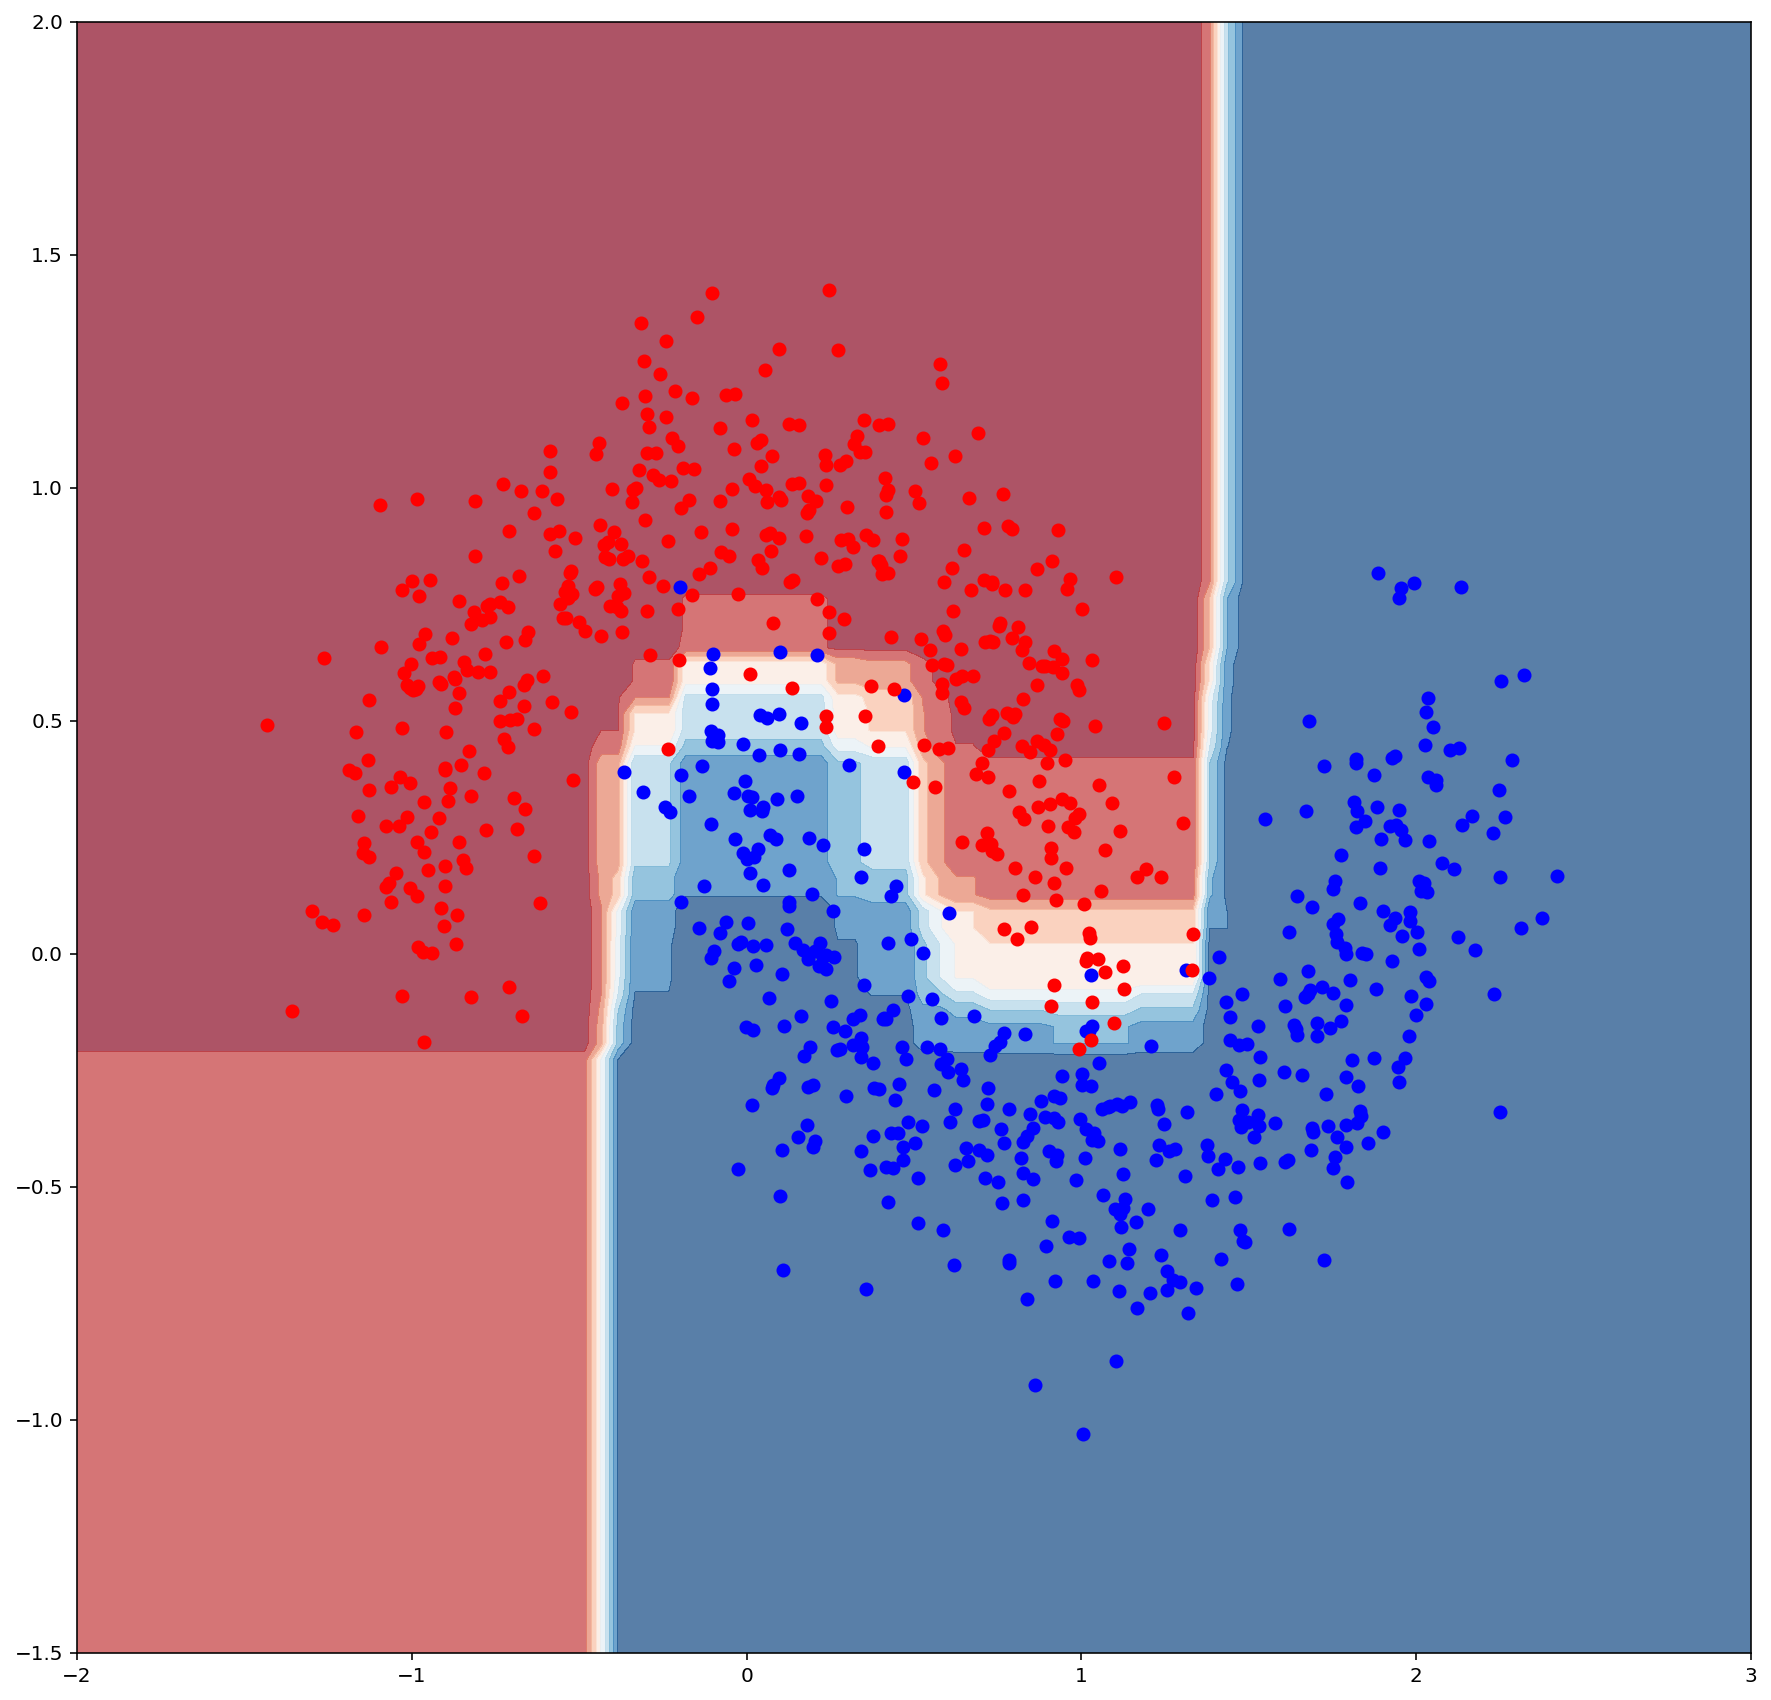

In [30]:
lrbt = -2.0, 3.0, -1.5, 2.0
x_grid, y_grid, scores = pred_grid_xgb(xgb, *lrbt, 100)
show_pred(X_train, y_train, x_grid, y_grid, scores)